In [1]:
import simphony.libraries.siepic as siepic
import simphony.libraries.analytic as analytic
import matplotlib.pyplot as plt

netlist={
    "instances": {
        "splitter":"ybranch",
        "combiner": "ybranch",  
        "top1": "waveguide",
        "top2": "waveguide",
        "bot1": "waveguide",
        "bot2": "waveguide",
        # "phase_modulator": "phase_modulator",
        "pm1": "phase_modulator",
        "pm2": "phase_modulator",

        "vs1": "voltage_source",
        "vs2": "voltage_source",
        # "vf": "voltage_follower",
        # "vf1": "voltage_follower",
        # "vf2": "voltage_follower",
        # "prng": "prng",

        # "pm2": "phase_modulator",
        # "vs2": "voltage_source",

        # "y1": "ybranch",
        # "y2": "ybranch",
    },
    "connections": {
        "splitter,port_2":"top1,o0",
        "splitter,port_3":"bot1,o0",
        "top2,o1":"combiner,port_2",   
        "bot2,o1": "combiner,port_3",
        
        "top1,o1":"pm1,o0",
        "pm1,o1":"top2,o0",
        "bot1,o1":"pm2,o0",
        "pm2,o1":"bot2,o0",
        
        # Should Work
        "vs1,e0":"pm1,e0",
        "vs2,e0":"pm2,e0",

        # Should Not Work
        # "pm1,e0":"vf,e0",
        # "vf,e1":"pm2,e0",
        
        # Multiple connections, same nodes
        # "y1,port_2": "y2,port_2",
        # "y1,port_3": "y2,port_3",

        # Invalid Connection
        # "vs2,e0":"pm2,o0",
    },
    "ports": {
        "in": "splitter,port_1",
        "out": "combiner,port_1",
    }
}

models={
    "ybranch": siepic.y_branch,
    # "ybranch": analytic.optical_s_parameter(siepic.y_branch),
    "waveguide": siepic.waveguide,
    "phase_modulator": analytic.OpticalModulator,
    "voltage_source": analytic.VoltageSource,
    # "prng": analytic.PRNG,
    # "voltage_follower": analytic.VoltageFollower,
}

settings={ 
    # "splitter": {"bad_setting": 10},
    "top1": {"length": 5},
    "top2": {"length": 5},
    "bot1": {"length": 10},
    "vs1": {"steady_state_voltage": 1.0, "steady_state_wl": 0}
}

/home/wyrgly/camacho/simphony/.venv/lib/python3.12/site-packages/gravis/_internal/plotting/template_system.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as _pkg_resources


In [2]:
from simphony.circuit import Circuit
ckt = Circuit(netlist, models)
ckt.display(inline=True)

In [3]:
from simphony.simulation import SParameterSimulation
import numpy as np
import time
from simphony.signals import optical_signal, electrical_signal
wl = np.linspace(1.5, 1.6, 1000)
sps = SParameterSimulation(ckt)
sps.run(wl, settings=settings)

distract
distract
distract


In [4]:
y_branch_inputs = {
    'port_1': optical_signal(field=[0.0, 10.0], wl=[1.55e-6, 1.57e-6]),
    'port_2': optical_signal(field=[0.5, 1.0], wl=[1.55e-6, 1.56e-6]),
    'port_3': optical_signal(field=[0.5, 1.0], wl=[1.55e-6, 1.56e-6]),
}


out_ybranch = sps.components['splitter'].steady_state(y_branch_inputs)

In [5]:
np.abs(out_ybranch['port_2'].field)**2

array([1.6693857e-04, 5.6914147e-04, 4.8092922e+01], dtype=float32)

In [6]:
voltage_source_inputs = {
    "e0": electrical_signal(voltage=0)
}

out_voltage_source = sps.components['vs1'].steady_state(voltage_source_inputs, **settings['vs1'])

In [7]:
out_voltage_source['e0']

SteadyStateElectricalSignal(voltage=Array([1.+0.j], dtype=complex64), wl=Array([0.], dtype=float32))

In [14]:
phase_modulator_inputs = {
    "o0": optical_signal(field=[1.0, 1.0], wl=[1.55e-6, 1.59e-6]),
    'o1': optical_signal(field=[1.0, 1.0], wl=[1.55e-6, 1.59e-6]),
    'e0': out_voltage_source['e0'],
}

out_phase_modulator = sps.components['pm1'].steady_state(phase_modulator_inputs)

In [16]:
out_phase_modulator['o1'].field[1]

Array(-0.99687845+0.07895155j, dtype=complex64)

In [21]:
np.angle(-1)

np.float64(3.141592653589793)

In [18]:
np.angle(out_phase_modulator['o1'].field)

array([3.1415927, 0.       ], dtype=float32)

In [7]:
sps.components

{'splitter': <simphony.circuit._optical_s_parameter.<locals>.SParameterSax at 0x7281c21e2900>,
 'combiner': <simphony.circuit._optical_s_parameter.<locals>.SParameterSax at 0x7281bc6fb140>,
 'top1': <simphony.circuit._optical_s_parameter.<locals>.SParameterSax at 0x7281bc0e1d30>,
 'top2': <simphony.circuit._optical_s_parameter.<locals>.SParameterSax at 0x7281bc0e2ff0>,
 'bot1': <simphony.circuit._optical_s_parameter.<locals>.SParameterSax at 0x7281bc0e3110>,
 'bot2': <simphony.circuit._optical_s_parameter.<locals>.SParameterSax at 0x7281bc0e3290>,
 'pm1': <simphony.libraries.analytic.modulators.PhaseModulator at 0x7281bc0e2e40>,
 'pm2': <simphony.libraries.analytic.modulators.PhaseModulator at 0x7281bc0e3380>,
 'vs1': <simphony.libraries.analytic.sources.VoltageSource at 0x7281bc0e0950>,
 'vs2': <simphony.libraries.analytic.sources.VoltageSource at 0x7281bc0e0b90>}

In [8]:
np.abs(x['port_1'].field)

NameError: name 'x' is not defined

In [ ]:
import jax

In [ ]:
times = []
for i in range(500):
    tic = time.perf_counter()
    sps.components['splitter'].steady_state(inputs)
    toc = time.perf_counter()
    times.append(toc-tic)

np.savez("jit.npz", times=times)
# np.savez("normal.npz", times=times)

In [ ]:
jit_times = np.load("jit.npz")['times']
normal_times = np.load("normal.npz")['times']

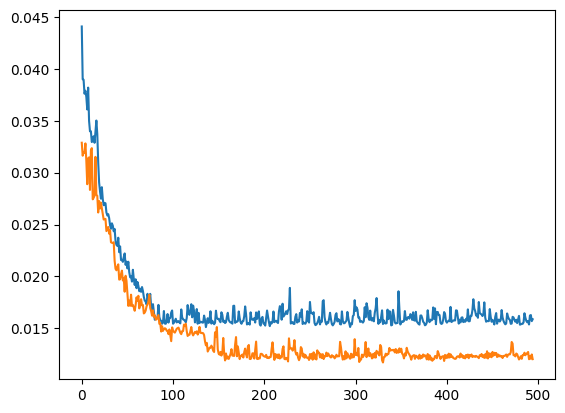

In [ ]:
plt.plot(normal_times[5:])
plt.plot(jit_times[5:])

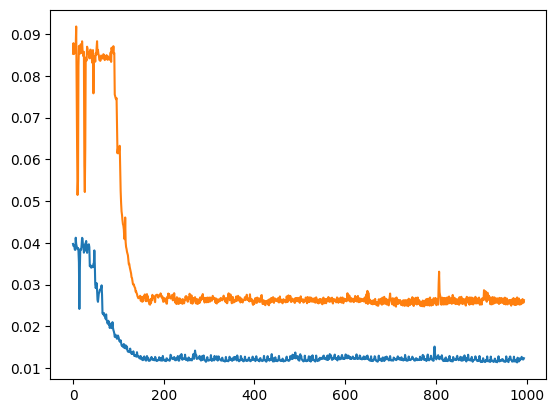

In [ ]:
normal_times = []
with jax.disable_jit():
    for i in range(int(1e3)):
        tic = time.perf_counter()
        sps.components['splitter'].steady_state(inputs)
        toc = time.perf_counter()
        normal_times.append(toc-tic)

plt.plot(jit_times[5:])
plt.plot(normal_times[5:])

In [ ]:
np.abs(x['port_1'].field)

array([0.69816595], dtype=float32)

In [ ]:
np.abs(x[1, :])**2

array([0.00126998, 0.48113094, 0.48103732])

In [ ]:
from simphony.signals import optical_signal
import jax
inputs = {
    'port_1': optical_signal(field=1.0, wl=[1.55e-6, 1.54e-6]),
    'port_2': optical_signal(field=2.0, wl=[1.53e-6]),
    'port_3': optical_signal(field=3.0, wl=[1.55e-6]),
}

@jax.jit
def dict_to_matrix(inputs: dict):
    ports = ["port_1", "port_2", "port_3"]
    num_ports = len(ports)
    for port in ports:
        inputs[port].wl.shape
    return inputs["port_1"].wl.shape[0]
    

dict_to_matrix(inputs)

Array(2, dtype=int64, weak_type=True)

In [ ]:
np.abs(x['port_2'].field)**2

np.float32(0.4811309)

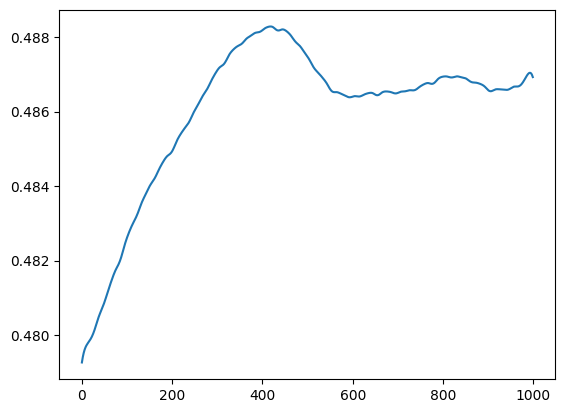

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.abs(sps.components['splitter'].s_parameters(wl)[('port_1','port_2')])**2)

In [ ]:
wg = sps.components['bot1']

In [ ]:
wg

<simphony.circuit._optical_s_parameter.<locals>.SParameterSax at 0x777573695910>

In [1]:
import simphony.libraries.siepic as siepic
import simphony.libraries.analytic as analytic

netlist={
    "instances": {
        "splitter": {
            "component":"ybranch",
            "settings":{
                "test_setting": 100,
            },
        },
        "combiner": "ybranch",  
        "top1": "waveguide",
        "top2": "waveguide",
        "bot1": "waveguide",
        "bot2": "waveguide",

        "pm1": "phase_modulator",
        "pm2": "phase_modulator",

        "vs1": "voltage_source",
        "vs2": "voltage_source",
        "vs3": "voltage_source",

        "opamp":"opamp",

        "vf1":"voltage_follower",
        "vf2":"voltage_follower",
        "vf3":"voltage_follower",
    },
    "connections": {
        "splitter,port_2":"top1,o0",
        "splitter,port_3":"bot1,o0",
        "top2,o1":"combiner,port_2",   
        "bot2,o1": "combiner,port_3",
        "top1,o1":"pm1,o0",
        "pm1,o1":"top2,o0",
        "bot1,o1":"pm2,o0",
        "pm2,o1":"bot2,o0",

        "vs1,e0":"""vf3,e0;
                      vf1,e0;""",

        "vs3,e0":"""vf2,e0;
                    opamp,inv""",
        
        "vs2,e0":"opamp,ninv",
        
        "vf2,e1":"opamp,vp",

        "vf3,e1":"pm2,e0",
        "vf1,e0":"opamp,vn",     

        "opamp,vout":"pm1,e0",
    },
    "ports": {
        "in": "splitter,port_1",
        "out": "combiner,port_1",
    }
}

models={
    "ybranch": siepic.y_branch,
    # "ybranch": analytic.optical_s_parameter(siepic.y_branch),
    "waveguide": analytic.Waveguide,
    "phase_modulator": analytic.OpticalModulator,
    "voltage_source": analytic.VoltageSource,
    "prng": analytic.PRNG,
    "voltage_follower": analytic.VoltageFollower,
    "opamp": analytic.OpAmp,
}

settings={ 
    # "splitter": {"bad_setting": 10},
    "top1": {"length": 5},
    "top2": {"length": 5},
    "bot1": {"length": 10},
}

/home/wyrgly/camacho/simphony/.venv/lib/python3.12/site-packages/gravis/_internal/plotting/template_system.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as _pkg_resources


In [2]:
from simphony.circuit import Circuit
ckt = Circuit(netlist, models, default_settings=settings)
ckt.display(inline=True)

In [3]:
from simphony.simulation import SParameterSimulation
import numpy as np
wl = np.linspace(1.5, 1.6, 1000)
sps = SParameterSimulation(ckt)
sps.run(wl)

NotImplementedError: steady_state method not defined for VoltageFollower

In [ ]:
sps.change_settings(settings, use_default_settings=True)

In [ ]:
print(ckt.default_settings)
print(sps.settings)
print(settings)

{'splitter': {'test_setting': 100}, 'combiner': {}, 'top1': {'length': 5}, 'top2': {'length': 5}, 'bot1': {'length': 10}, 'bot2': {}, 'pm1': {}, 'pm2': {}, 'vs1': {}, 'vs2': {}, 'vs3': {}, 'opamp': {}, 'vf1': {}, 'vf2': {}, 'vf3': {}}
{'splitter': {'test_setting': 100}, 'combiner': {}, 'top1': {'length': 5}, 'top2': {'length': 5}, 'bot1': {'length': 10}, 'bot2': {'joke_setting': 'Joke'}, 'pm1': {}, 'pm2': {}, 'vs1': {}, 'vs2': {}, 'vs3': {}, 'opamp': {}, 'vf1': {}, 'vf2': {}, 'vf3': {}}
{'bot2': {'joke_setting': 'Joke'}}


In [ ]:
sps.steady_state_order

['vs1', 'vs2', 'vs3', 'vf1', 'vf2', 'vf3', 'opamp']

In [ ]:
ckt.default_settings

In [ ]:
from simphony.simulation.simulation import SParameterSimulation

sps = SParameterSimulation(ckt)
sps.update_settings(settings)

In [ ]:
from sax.models import unitary

In [ ]:
from simphony.libraries.analytic import star_coupler


In [ ]:
print(star_coupler(2, 2).optical_ports)

{'e0': ElectricalSignal(voltage=Array(0.5+0.j, dtype=complex64), wl=Array(0., dtype=float32)),
 'o0': OpticalSignal(field=Array(-4.371139e-08+1.j, dtype=complex64), wl=Array(1.55e-06, dtype=float32), polarization=Array([1.+0.j, 0.+0.j], dtype=complex64)),
 'o1': OpticalSignal(field=Array(-4.371139e-08+1.j, dtype=complex64), wl=Array(1.55e-06, dtype=float32), polarization=Array([1.+0.j, 0.+0.j], dtype=complex64))}